# Bolt Case

## Questions

1) What is the supply to demand dynamic and whether they match?

2) Where are the hours of oversupply? Can we shift some of them to undersupply hours?

## Insights / Output

1.	36h undersupplied
    -    Coverage start to decrease on Tuesday, reaching its lowest peak on Friday.
    -	Coverage decreases greatly from Wednesday to Friday.
    -	The most undersupplied 36h of this week is from 16/12 at 1 AM (Friday) til 17/12 at noon (Saturday), with coverage ratio average of 53.63%
    
2.	24h peak
    -	The peaks of average of active drivers are Friday (60.71) and Saturday (61.62) = don’t cover the demand
    -	The peak of passengers is Friday (114 passengers avg)
    -	There is an reasonable equilibrium between supply and demand on Tuesday, Wednesday and Sunday;
    -	Coverage oversupplied on Monday;
    -	Coverage undersupplied on Thursday, Friday and Saturday;
    
3.	Lack of supply
    -	Thursday to Friday we have more undersupplied times.
    
    
4.	Estimate hours

    -	We have 85h oversupplied with drivers, which we can allocate to cover the 36h undersupplied
    -   There is + 1815 passengers in this 36h period
    -   We have 1287 drivers in the 85h oversupplied period
    
5.	Guaranteed hourly earnings 

    -	Our average profit is 20% of driver's finished rides and they get the other 80%. As we have the emergency to supply the undercoverage shifts, we can increase the drivers'earnings up to 10-15% as an incentive to them for cover the undersupplied periods. We'll be receiving 1/4 of the average profit, but it's not a loss and we can cover all undersupplied spots with 85 hours oversupplied.


# Technical Part

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import os

## Analyzing datasets

In [2]:
# Supply table
driver = pd.read_csv("Hourly_DriverActivity_1.csv")
driver

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0
...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0


In [3]:
# demand table
overview = pd.read_csv("Hourly_OverviewSearch_1.csv")
overview

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,9,32,78
1,2016-12-18 22,29,64,69
2,2016-12-18 21,5,39,89
3,2016-12-18 20,13,48,79
4,2016-12-18 19,12,77,87
...,...,...,...,...
834,2016-11-14 04,4,4,50
835,2016-11-14 03,1,2,67
836,2016-11-14 02,3,6,67
837,2016-11-14 01,8,8,50


### Checking missing row from Hourly Overview table

In [4]:
#concatenating both tables and sorting values by date column
check = pd.concat([driver.Date.sort_values(), overview.Date.sort_values()],axis=1)
check.columns = ['date1','date2']

In [5]:
#mask rows in descending order to see missing row
check.loc[~(check.apply(lambda x: x.date1 == x.date2, axis=1))]

,date1,date2
282,2016-12-07 05,2016-12-07 04
283,2016-12-07 04,2016-12-07 03
284,2016-12-07 03,2016-12-07 02
285,2016-12-07 02,2016-12-07 01
286,2016-12-07 01,2016-12-07 00
...,...,...
835,2016-11-14 04,2016-11-14 03
836,2016-11-14 03,2016-11-14 02
837,2016-11-14 02,2016-11-14 01
838,2016-11-14 01,2016-11-14 00


In [6]:
# checking row 282
check.loc[[282]]

,date1,date2
282,2016-12-07 05,2016-12-07 04


In [7]:
driver.loc[[282,283,284,285]]

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
282,2016-12-07 05,24,8,0,8,10,0.3,0.00,NaN
283,2016-12-07 04,24,10,0,10,8,0.4,0.00,NaN
284,2016-12-07 03,28,10,1,9,8,0.4,0.10,1.0
285,2016-12-07 02,28,11,2,9,10,0.4,0.55,6.0


In [8]:
overview.loc[[282,283,284,285]]

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
282,2016-12-07 04,2,2,50
283,2016-12-07 03,0,2,100
284,2016-12-07 02,5,13,72
285,2016-12-07 01,0,16,100


Insight:

- The row 282 from Hourly_Driver Activity Table can be a shift because of NaN

### Merge dataframes by Date column

In [9]:
#outer join both datasets to keep all info
df = pd.merge(driver, overview, on='Date',how='outer')
df

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.00,NaN,4.0,4.0,50.0
836,2016-11-14 03,18,7,0,7,7,0.4,0.00,NaN,1.0,2.0,67.0
837,2016-11-14 02,21,7,0,7,9,0.3,0.14,1.0,3.0,6.0,67.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.22,2.0,8.0,8.0,50.0


In [10]:
#double-check if outer join worked
df.loc[280:285]

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
280,2016-12-07 07,48,16,4,12,14,0.3,0.50,8.0,16.0,21.0,57.0
281,2016-12-07 06,31,9,1,8,10,0.3,0.33,3.0,5.0,11.0,69.0
282,2016-12-07 05,24,8,0,8,10,0.3,0.00,NaN,NaN,NaN,NaN
283,2016-12-07 04,24,10,0,10,8,0.4,0.00,NaN,2.0,2.0,50.0
284,2016-12-07 03,28,10,1,9,8,0.4,0.10,1.0,0.0,2.0,100.0
285,2016-12-07 02,28,11,2,9,10,0.4,0.55,6.0,5.0,13.0,72.0


## Cleaning dataset

### Checking and cleaning NaN

In [11]:
#discover type 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 12 columns):
Date                           840 non-null object
Active drivers                 840 non-null int64
Online (h)                     840 non-null int64
Has booking (h)                840 non-null int64
Waiting for booking (h)        840 non-null int64
Busy (h)                       840 non-null int64
Hours per active driver        840 non-null float64
Rides per online hour          840 non-null float64
Finished Rides                 795 non-null float64
People saw 0 cars (unique)     839 non-null float64
People saw +1 cars (unique)    839 non-null float64
Coverage Ratio (unique)        839 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 125.3+ KB


In [12]:
#See number of NaN in each column
print(df['Date'].isnull().sum()) #date column is object
print(df['Finished Rides'].isnull().sum())
print(df['People saw 0 cars (unique)'].isnull().sum())
print(df['People saw +1 cars (unique)'].isnull().sum())
print(df['Coverage Ratio (unique)'].isnull().sum())

0
45
1
1
1


In [13]:
pd.set_option('precision', 1)

In [14]:
# fill Nan using interpolation method to avoid removing data and considering 0 values in the dataset.
df = df.interpolate(method='linear', limit_direction='forward',)
df

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.7,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.4,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.6,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.5,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.2,36.0,12.0,77.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.0,2.3,4.0,4.0,50.0
836,2016-11-14 03,18,7,0,7,7,0.4,0.0,1.7,1.0,2.0,67.0
837,2016-11-14 02,21,7,0,7,9,0.3,0.1,1.0,3.0,6.0,67.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.2,2.0,8.0,8.0,50.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 12 columns):
Date                           840 non-null object
Active drivers                 840 non-null int64
Online (h)                     840 non-null int64
Has booking (h)                840 non-null int64
Waiting for booking (h)        840 non-null int64
Busy (h)                       840 non-null int64
Hours per active driver        840 non-null float64
Rides per online hour          840 non-null float64
Finished Rides                 840 non-null float64
People saw 0 cars (unique)     840 non-null float64
People saw +1 cars (unique)    840 non-null float64
Coverage Ratio (unique)        840 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 125.3+ KB


### Checking rows with 0 values in all columns

In [16]:
df.loc[(df!=0).any(1)]

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23,52,18,6,11,11,0.3,0.7,12.0,9.0,32.0,78.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.4,28.0,29.0,64.0,69.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.6,16.0,5.0,39.0,89.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.5,15.0,13.0,48.0,79.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.2,36.0,12.0,77.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14 04,15,6,0,6,6,0.4,0.0,2.3,4.0,4.0,50.0
836,2016-11-14 03,18,7,0,7,7,0.4,0.0,1.7,1.0,2.0,67.0
837,2016-11-14 02,21,7,0,7,9,0.3,0.1,1.0,3.0,6.0,67.0
838,2016-11-14 01,29,9,1,8,11,0.3,0.2,2.0,8.0,8.0,50.0


### Exporting dataframe to format Date column

In [17]:
#Exporting df to csv file and format in Libre Office 

# df.to_csv('Merged tables.csv')

In [18]:
#Bring df2 with Date(formated), Day of Week and Time columns added

df2 = pd.read_csv('Merged tables.csv')
df2.head(1)

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.7,12.0,9.0,32.0,78.0


## Assignment output 

### Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data

In [19]:
#Checking general information about the dataframe (outliers, quartile, etc)
pd.set_option('precision', 2)
df2.describe()

,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
count,840.0,840.00,840.00,840.0,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00,840.00
mean,4.0,11.50,61.60,23.2,6.31,16.90,15.27,0.37,0.57,14.11,12.23,36.01,75.64
std,2.0,6.93,25.95,11.1,5.54,9.07,6.41,0.07,0.39,11.40,16.60,25.17,18.34
min,1.0,0.00,9.00,2.0,0.00,2.00,1.00,0.10,0.00,1.00,0.00,0.00,0.00
25%,2.0,5.75,41.00,14.0,2.00,10.00,10.00,0.30,0.29,6.00,3.00,19.00,66.00
50%,4.0,11.50,63.00,23.0,5.00,16.00,15.00,0.40,0.50,11.00,6.00,32.00,80.00
75%,6.0,17.25,80.25,31.0,9.00,23.00,20.00,0.40,0.79,20.00,14.00,49.00,89.00
max,7.0,23.00,129.00,56.0,29.00,48.00,37.00,0.60,2.03,62.00,129.00,172.00,100.00


Insight:

- Each row represents 1h. Therefore, 840 rows = 840h (5 weeks)

#### Taking week 12/12 - 18/12 to be see the 36h undersupplied

In [97]:
#Slicing dataset into dataset for week 1
df_week_1 = df2.loc[0:167]


In [98]:
pd.set_option('display.max_rows', 500)
df_week_1

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.00,9.0,32.0,78.0
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.00,29.0,64.0,69.0
2,2016-12-18,7,21,72,25,7,18,15,0.3,0.64,16.00,5.0,39.0,89.0
3,2016-12-18,7,20,86,29,7,23,15,0.3,0.52,15.00,13.0,48.0,79.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.00,12.0,77.0,87.0
5,2016-12-18,7,18,81,32,14,18,18,0.4,1.00,32.00,13.0,62.0,83.0
6,2016-12-18,7,17,72,30,13,17,13,0.4,0.87,26.00,9.0,61.0,87.0
7,2016-12-18,7,16,68,23,9,13,13,0.3,1.04,24.00,20.0,60.0,75.0
8,2016-12-18,7,15,65,24,5,19,12,0.4,0.50,12.00,7.0,37.0,84.0
9,2016-12-18,7,14,50,17,7,10,12,0.3,0.82,14.00,16.0,43.0,73.0


C:\Users\AlexandreH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


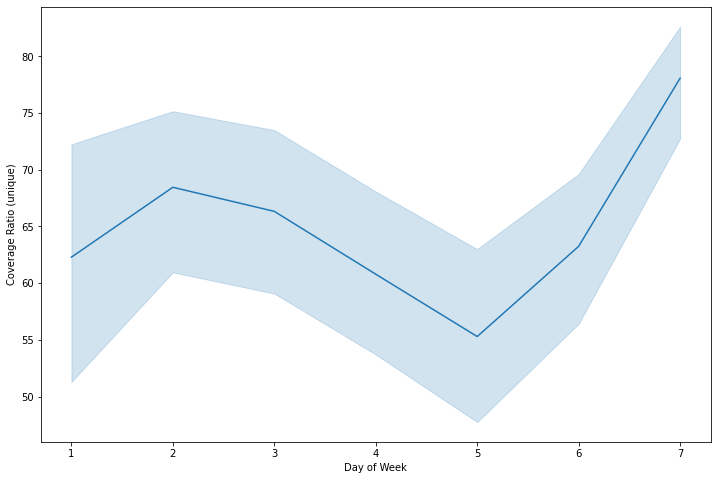

In [22]:
#plot to check general overview of Day of Week x Coverage  
plt.figure(figsize=(12,8))

sns.lineplot(df_week_1['Day of Week'], df_week_1['Coverage Ratio (unique)'])

plt.xlabel('Day of Week')
plt.ylabel('Coverage Ratio (unique)')

plt.show()



- Coverage start to decrease on Tuesday (2), reaching its lowest peak on Friday.

In [23]:
# Checking coverage mean by each day of week 
df_week_1.groupby(['Day of Week'])[['Coverage Ratio (unique)']].mean()

,Coverage Ratio (unique)
Day of Week,
1,62.29
2,68.46
3,66.33
4,60.79
5,55.29
6,63.25
7,78.08


- Coverage decreases from Wednesday to Friday.

In [24]:
#Taking rolling coverage average of all 168h to see which 36h is undersupplied during this week
x = df_week_1[['Time', 'Coverage Ratio (unique)','Day of Week']]

In [25]:
x['36h Coverage Average'] = x.iloc[:,1].rolling(window=36).mean()

C:\Users\AlexandreH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
x

,Time,Coverage Ratio (unique),Day of Week,36h Coverage Average
0,23,78.0,7,NaN
1,22,69.0,7,NaN
2,21,89.0,7,NaN
3,20,79.0,7,NaN
4,19,87.0,7,NaN
5,18,83.0,7,NaN
6,17,87.0,7,NaN
7,16,75.0,7,NaN
8,15,84.0,7,NaN
9,14,73.0,7,NaN


In [27]:
#Check coverage average minimum value
x['36h Coverage Average'].min()

53.638888888888886

In [28]:
x[(x['36h Coverage Average'] == 53.638888888888886)]

,Time,Coverage Ratio (unique),Day of Week,36h Coverage Average
71,0,70.0,5,53.64


In [29]:
#Check 36h undersupplied in a row in this week
df_week_1[35:71]

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
35,2016-12-17,6,12,41,15,3,12,10,0.4,0.40,6.0,16.0,42.0,72.0
36,2016-12-17,6,11,34,12,5,7,9,0.4,1.08,13.0,30.0,25.0,45.0
37,2016-12-17,6,10,28,6,2,3,8,0.2,1.00,6.0,36.0,18.0,33.0
38,2016-12-17,6,9,23,7,4,2,6,0.3,1.14,8.0,37.0,25.0,40.0
39,2016-12-17,6,8,23,6,1,4,6,0.3,0.67,4.0,17.0,15.0,47.0
40,2016-12-17,6,7,20,7,2,6,7,0.3,0.71,5.0,8.0,11.0,58.0
41,2016-12-17,6,6,36,7,3,4,12,0.2,0.43,3.0,10.0,9.0,47.0
42,2016-12-17,6,5,51,11,6,5,20,0.2,0.91,10.0,12.0,25.0,68.0
43,2016-12-17,6,4,46,14,11,3,22,0.3,1.86,26.0,106.0,54.0,34.0
44,2016-12-17,6,3,64,21,16,5,23,0.3,1.76,37.0,105.0,87.0,45.0


The most undersupplied 36h of this week is from 16/12 at 1 AM (Friday) til 17/12 at noon (Saturday), with coverage ratio average of 53.63%

### 24-hour curve of average supply and demand (to illustrate match/mismatch).

Taking the average of supply and demand curve for 7 days (Mon-Sun). Using the same 12-18/12 week.

#### Average supply curve

In [43]:
#Dataset of week 1
df_week_1

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.00,9.0,32.0,78.0
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.00,29.0,64.0,69.0
2,2016-12-18,7,21,72,25,7,18,15,0.3,0.64,16.00,5.0,39.0,89.0
3,2016-12-18,7,20,86,29,7,23,15,0.3,0.52,15.00,13.0,48.0,79.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.00,12.0,77.0,87.0
5,2016-12-18,7,18,81,32,14,18,18,0.4,1.00,32.00,13.0,62.0,83.0
6,2016-12-18,7,17,72,30,13,17,13,0.4,0.87,26.00,9.0,61.0,87.0
7,2016-12-18,7,16,68,23,9,13,13,0.3,1.04,24.00,20.0,60.0,75.0
8,2016-12-18,7,15,65,24,5,19,12,0.4,0.50,12.00,7.0,37.0,84.0
9,2016-12-18,7,14,50,17,7,10,12,0.3,0.82,14.00,16.0,43.0,73.0


In [44]:
#dividing df_week_1 into 7 dataframes which represent each day of the week
df_sunday = df_week_1[0:24]
df_saturday = df_week_1[24:48]
df_friday = df_week_1[48:72]
df_thursday = df_week_1[72:96]
df_wednesday = df_week_1[96:120]
df_tuesday = df_week_1[120:144]
df_monday = df_week_1[144:168]

In [45]:
#calculating mean supply of each day (Active drivers)
print(df_sunday['Active drivers'].mean()) 
print(df_saturday['Active drivers'].mean()) 
print(df_friday['Active drivers'].mean()) 
print(df_thursday['Active drivers'].mean()) 
print(df_wednesday['Active drivers'].mean()) 
print(df_tuesday['Active drivers'].mean())
print(df_monday['Active drivers'].mean()) 

55.5
61.625
60.708333333333336
53.291666666666664
56.291666666666664
54.125
51.666666666666664


In [46]:
#create a dataframe with supply means
drivers_mean = [[55.5 , 7], [61.62, 6], [60.71 , 5], [53.29, 4], [56.29, 3], [54.12, 2],[51.66, 1], ]
drivers_mean = pd.DataFrame(drivers_mean, columns= ['Supply Means', 'Days'])
drivers_mean

,Supply Means,Days
0,55.50,7
1,61.62,6
2,60.71,5
3,53.29,4
4,56.29,3
5,54.12,2
6,51.66,1


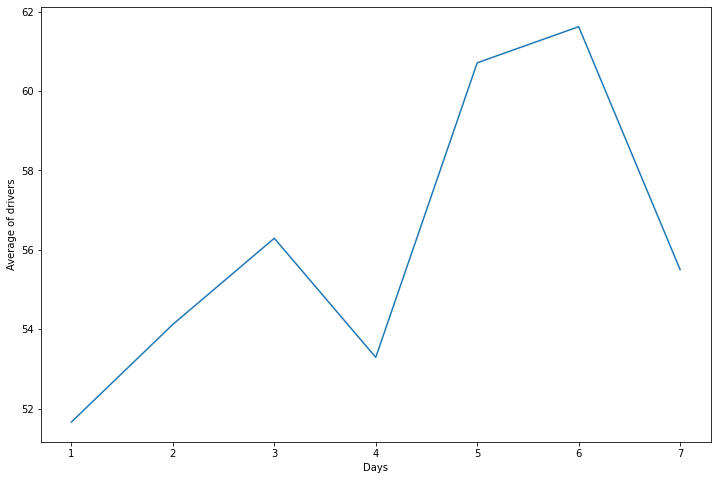

In [47]:
#Plot supply curve
plt.figure(figsize=(12,8))

plt.plot(drivers_mean['Days'], drivers_mean['Supply Means'])

plt.xlabel('Days')
plt.ylabel('Average of drivers')

plt.show()

Insights:

- The peaks of average of active drivers are Friday (60.71) and Saturday (61.62)

#### Average demand curve

Insight: 

- Coverage Ratio (unique) = "people saw +1 cars"/ ("people saw +1 cars" + "people saw 0 cars")

In [48]:
df_week_1.head()

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0
2,2016-12-18,7,21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0
3,2016-12-18,7,20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0


In [101]:
# Creating a demand column to sum People saw +1 car and People saw 0 cars columns to see the total demand of passengers.
# People saw 0 cars is considered demand as the passengers for whatever reason logged in the app and didn't see a car.

sum_column = df_week_1["People saw 0 cars (unique)"] + df_week_1["People saw +1 cars (unique)"]
df_week_1["Demand of passengers"] = sum_column
print(df_week_1)

           Date  Day of Week  Time  Active drivers  Online (h)  \
0    2016-12-18            7    23              52          18   
1    2016-12-18            7    22              59          20   
2    2016-12-18            7    21              72          25   
3    2016-12-18            7    20              86          29   
4    2016-12-18            7    19              82          31   
5    2016-12-18            7    18              81          32   
6    2016-12-18            7    17              72          30   
7    2016-12-18            7    16              68          23   
8    2016-12-18            7    15              65          24   
9    2016-12-18            7    14              50          17   
10   2016-12-18            7    13              44          15   
11   2016-12-18            7    12              40          15   
12   2016-12-18            7    11              38          10   
13   2016-12-18            7    10              29           9   
14   2016-

C:\Users\AlexandreH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [102]:
df_week_1.head(1)

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Demand of passengers
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0,41.0


In [51]:
#dividing dataframe per day
df_sunday = df_week_1[0:24]
df_saturday = df_week_1[24:48]
df_friday = df_week_1[48:72]
df_thursday = df_week_1[72:96]
df_wednesday = df_week_1[96:120]
df_tuesday = df_week_1[120:144]
df_monday = df_week_1[144:168]

In [52]:
#calculating mean demand of each day (People saw +1 car and People saw 0 cars (unique))
print(df_sunday['Demand of passengers'].mean()) 
print(df_saturday['Demand of passengers'].mean()) 
print(df_friday['Demand of passengers'].mean()) 
print(df_thursday['Demand of passengers'].mean()) 
print(df_wednesday['Demand of passengers'].mean()) 
print(df_tuesday['Demand of passengers'].mean())
print(df_monday['Demand of passengers'].mean()) 

55.75
88.54166666666667
113.79166666666667
76.95833333333333
61.416666666666664
52.333333333333336
38.583333333333336


In [53]:
#create a dataframe with demand means
passengers_means = [[55.75 , 7], [88.41, 6], [113.79 , 5], [76.96, 4], [61.41, 3], [52.33, 2],[38.58, 1]]
passengers_means = pd.DataFrame(passengers_means, columns= ['Demand Means', 'Days'])
passengers_means

,Demand Means,Days
0,55.75,7
1,88.41,6
2,113.79,5
3,76.96,4
4,61.41,3
5,52.33,2
6,38.58,1


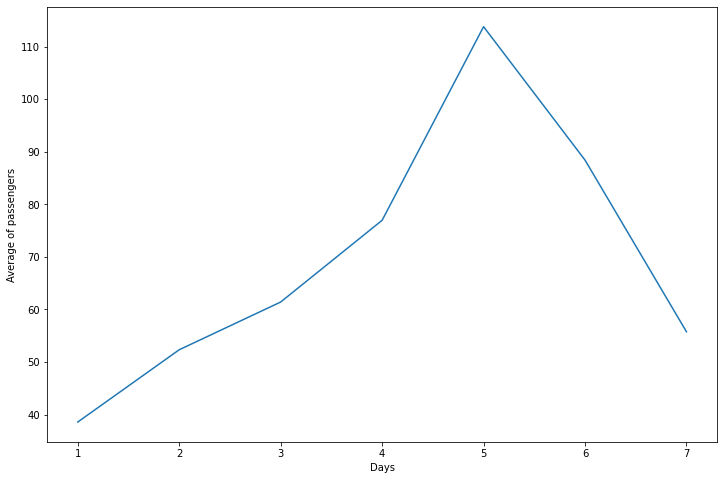

In [54]:
#Plot demand curve
plt.figure(figsize=(12,8))

plt.plot(passengers_means['Days'], passengers_means['Demand Means'])

plt.xlabel('Days')
plt.ylabel('Average of passengers')

plt.show()

Insights:

- The peak of passengers is Friday (114 passengers avg)

#### Match and mismatch between supply and demand



C:\Users\AlexandreH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\AlexandreH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


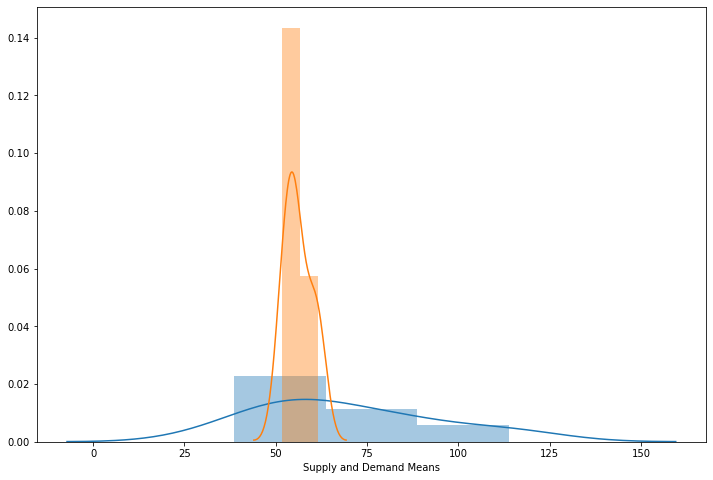

In [55]:
#Bar plot to see intersections of means
plt.figure(figsize=(12,8))

sns.distplot(passengers_means['Demand Means'])

sns.distplot(drivers_mean['Supply Means'])

plt.xlabel('Supply and Demand Means')

plt.show()



In [56]:
#Supply means table
drivers_mean


,Supply Means,Days
0,55.50,7
1,61.62,6
2,60.71,5
3,53.29,4
4,56.29,3
5,54.12,2
6,51.66,1


In [57]:
#demand means table
passengers_means

,Demand Means,Days
0,55.75,7
1,88.41,6
2,113.79,5
3,76.96,4
4,61.41,3
5,52.33,2
6,38.58,1


General insights:

- There is an reasonable equilibrium between supply and demand on Tuesday, Wednesday and Sunday;
- Coverage oversupplied on Monday;
- Coverage undersupplied on Thursday, Friday and Saturday;

### Visualisation of hours where we lack supply during a weekly period. This one we can send to drivers to show when to online for extra hours.

- Taking 12/12-18/12. We'll compare the number of active drivers x demand of passengers and see if there is an equilibrium between active drivers and passengers.



#### Creating a difference between supply and demand column

In [103]:
df_week_1.head(5)

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Demand of passengers
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.0,9.0,32.0,78.0,41.0
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0,93.0
2,2016-12-18,7,21,72,25,7,18,15,0.3,0.64,16.0,5.0,39.0,89.0,44.0
3,2016-12-18,7,20,86,29,7,23,15,0.3,0.52,15.0,13.0,48.0,79.0,61.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0,89.0


Insight:

- Online = Has booking + Waiting for booking
- Active drivers = can be idle drivers too.
- Desconsidering Online column as output request is confusing. It would be considered 1h Online = 1 Driver but there's no information to confirm that and subtract it from Active drivers (to eliminate idle ones).

In [104]:
#Selecting Active drivers and Demand of passengers
df_week_1[['Date','Active drivers','Demand of passengers']]

,Date,Active drivers,Demand of passengers
0,2016-12-18,52,41.0
1,2016-12-18,59,93.0
2,2016-12-18,72,44.0
3,2016-12-18,86,61.0
4,2016-12-18,82,89.0
5,2016-12-18,81,75.0
6,2016-12-18,72,70.0
7,2016-12-18,68,80.0
8,2016-12-18,65,44.0
9,2016-12-18,50,59.0


In [105]:
#Creating a difference column between supply and demand
difference_column = df_week_1["Active drivers"] - df_week_1["Demand of passengers"]
df_week_1["Difference supply and demand"] = difference_column
df_week_1

C:\Users\AlexandreH\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Demand of passengers,Difference supply and demand
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.00,9.0,32.0,78.0,41.0,11.0
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.00,29.0,64.0,69.0,93.0,-34.0
2,2016-12-18,7,21,72,25,7,18,15,0.3,0.64,16.00,5.0,39.0,89.0,44.0,28.0
3,2016-12-18,7,20,86,29,7,23,15,0.3,0.52,15.00,13.0,48.0,79.0,61.0,25.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.00,12.0,77.0,87.0,89.0,-7.0
5,2016-12-18,7,18,81,32,14,18,18,0.4,1.00,32.00,13.0,62.0,83.0,75.0,6.0
6,2016-12-18,7,17,72,30,13,17,13,0.4,0.87,26.00,9.0,61.0,87.0,70.0,2.0
7,2016-12-18,7,16,68,23,9,13,13,0.3,1.04,24.00,20.0,60.0,75.0,80.0,-12.0
8,2016-12-18,7,15,65,24,5,19,12,0.4,0.50,12.00,7.0,37.0,84.0,44.0,21.0
9,2016-12-18,7,14,50,17,7,10,12,0.3,0.82,14.00,16.0,43.0,73.0,59.0,-9.0


#### Checking which days and times are undercovered

In [106]:
# Sorting out Difference supply and demand to see which hours need coverage

pd.set_option('display.max_rows', 500)
df_week_1.sort_values(by='Difference supply and demand')

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Demand of passengers,Difference supply and demand
52,2016-12-16,5,19,93,33,24,8,22,0.4,1.09,36.00,129.0,141.0,52.0,270.0,-177.0
51,2016-12-16,5,20,108,38,25,13,24,0.4,1.63,62.00,87.0,172.0,66.0,259.0,-151.0
53,2016-12-16,5,18,92,41,29,11,25,0.4,1.15,47.00,62.0,169.0,73.0,231.0,-139.0
77,2016-12-15,4,18,59,25,21,4,17,0.4,1.72,43.00,124.0,72.0,37.0,196.0,-137.0
44,2016-12-17,6,3,64,21,16,5,23,0.3,1.76,37.00,105.0,87.0,45.0,192.0,-128.0
76,2016-12-15,4,19,70,30,26,4,16,0.4,1.47,44.00,105.0,81.0,44.0,186.0,-116.0
62,2016-12-16,5,9,47,22,17,5,10,0.5,1.59,35.00,90.0,73.0,45.0,163.0,-116.0
43,2016-12-17,6,4,46,14,11,3,22,0.3,1.86,26.00,106.0,54.0,34.0,160.0,-114.0
45,2016-12-17,6,2,74,27,19,8,21,0.4,1.52,41.00,67.0,102.0,60.0,169.0,-95.0
101,2016-12-14,3,18,69,27,21,6,19,0.4,1.11,30.00,96.0,66.0,41.0,162.0,-93.0


In [111]:
#show only difference below 0 (that's need coverage of drivers)
 
df_week_1[(df_week_1['Difference supply and demand'] < 0)]


,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Demand of passengers,Difference supply and demand
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.0,29.0,64.0,69.0,93.0,-34.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.0,12.0,77.0,87.0,89.0,-7.0
7,2016-12-18,7,16,68,23,9,13,13,0.3,1.04,24.0,20.0,60.0,75.0,80.0,-12.0
9,2016-12-18,7,14,50,17,7,10,12,0.3,0.82,14.0,16.0,43.0,73.0,59.0,-9.0
10,2016-12-18,7,13,44,15,7,7,12,0.3,1.47,22.0,19.0,46.0,71.0,65.0,-21.0
11,2016-12-18,7,12,40,15,3,11,9,0.4,0.67,10.0,9.0,35.0,80.0,44.0,-4.0
19,2016-12-18,7,4,46,16,12,4,15,0.3,1.88,30.0,47.0,55.0,54.0,102.0,-56.0
20,2016-12-18,7,3,54,23,10,12,16,0.4,1.17,27.0,15.0,72.0,83.0,87.0,-33.0
22,2016-12-18,7,1,79,25,13,12,22,0.3,1.16,29.0,21.0,69.0,77.0,90.0,-11.0
26,2016-12-17,6,21,103,39,18,21,24,0.4,1.21,47.0,25.0,96.0,79.0,121.0,-18.0


In [114]:
#Dates, Day of week and time we're specifically undersupplied
y = df_week_1[(df_week_1['Difference supply and demand'] < 0)]
y[['Date','Day of Week','Time','Difference supply and demand']]

,Date,Day of Week,Time,Difference supply and demand
1,2016-12-18,7,22,-34.0
4,2016-12-18,7,19,-7.0
7,2016-12-18,7,16,-12.0
9,2016-12-18,7,14,-9.0
10,2016-12-18,7,13,-21.0
11,2016-12-18,7,12,-4.0
19,2016-12-18,7,4,-56.0
20,2016-12-18,7,3,-33.0
22,2016-12-18,7,1,-11.0
26,2016-12-17,6,21,-18.0


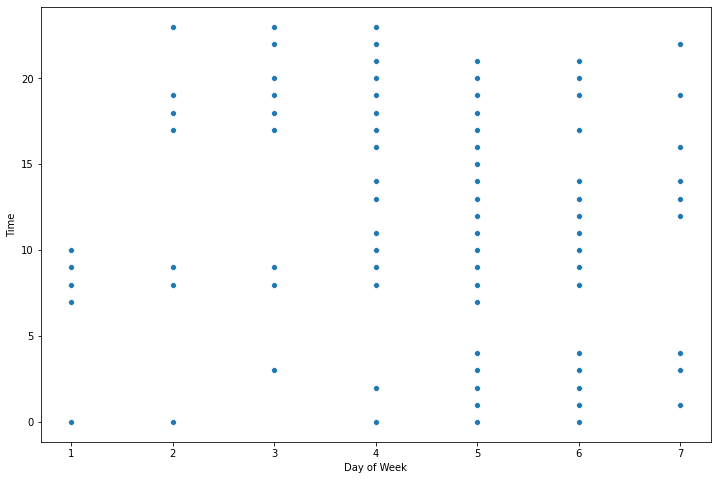

In [127]:
# plot undersupplied days

plt.figure(figsize=(12,8))

sns.scatterplot(y['Day of Week'], y['Time'], data=y)

plt.xlabel('Day of Week')
plt.ylabel('Time')

plt.show()

- Thursday to Friday we have more undersupplied times.

### Estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours

 #### Count estimate necessary hours 

In [115]:
y.count()

Date                            82
Day of Week                     82
Time                            82
Active drivers                  82
Online (h)                      82
Has booking (h)                 82
Waiting for booking (h)         82
Busy (h)                        82
Hours per active driver         82
Rides per online hour           82
Finished Rides                  82
People saw 0 cars (unique)      82
People saw +1 cars (unique)     82
Coverage Ratio (unique)         82
Demand of passengers            82
Difference supply and demand    82
dtype: int64

- We need + 82 hour to cover undersupplied drivers for week 1

In [74]:
# mask
#df[(df['country'] == 'Angola') | (df['country'] == 'Algeria')]

### Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly hours with highest demand without losing money + how much extra hours we want to get to capture missed demand

#### Discovering oversupplied hours in week 1 

In [118]:
#Discovering how many hours in a week we're oversupplied
z = df_week_1[(df_week_1['Difference supply and demand'] > 0)]
z[['Date','Day of Week','Time','Difference supply and demand']]

,Date,Day of Week,Time,Difference supply and demand
0,2016-12-18,7,23,11.0
2,2016-12-18,7,21,28.0
3,2016-12-18,7,20,25.0
5,2016-12-18,7,18,6.0
6,2016-12-18,7,17,2.0
8,2016-12-18,7,15,21.0
12,2016-12-18,7,11,9.0
13,2016-12-18,7,10,7.0
14,2016-12-18,7,9,10.0
15,2016-12-18,7,8,14.0


In [119]:
#Summing how many extra hours we have in a week
z[['Date','Day of Week','Time','Difference supply and demand']].count()

Date                            85
Day of Week                     85
Time                            85
Difference supply and demand    85
dtype: int64

- We have 85h oversupplied with drivers, which we can allocate to cover the 36h

#### Discovering how much can we pay for extra hours

In [120]:
#RPH = Finished rides / Online hours
df2

,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18,7,23,52,18,6,11,11,0.3,0.67,12.00,9.0,32.0,78.0
1,2016-12-18,7,22,59,20,11,9,12,0.3,1.40,28.00,29.0,64.0,69.0
2,2016-12-18,7,21,72,25,7,18,15,0.3,0.64,16.00,5.0,39.0,89.0
3,2016-12-18,7,20,86,29,7,23,15,0.3,0.52,15.00,13.0,48.0,79.0
4,2016-12-18,7,19,82,31,14,17,19,0.4,1.16,36.00,12.0,77.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2016-11-14,1,4,15,6,0,6,6,0.4,0.00,2.33,4.0,4.0,50.0
836,2016-11-14,1,3,18,7,0,7,7,0.4,0.00,1.67,1.0,2.0,67.0
837,2016-11-14,1,2,21,7,0,7,9,0.3,0.14,1.00,3.0,6.0,67.0
838,2016-11-14,1,1,29,9,1,8,11,0.3,0.22,2.00,8.0,8.0,50.0


In [121]:
#Checking 36h undersupplied in week 1
df_week_1[35:71]


,Date,Day of Week,Time,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique),Demand of passengers,Difference supply and demand
35,2016-12-17,6,12,41,15,3,12,10,0.4,0.40,6.0,16.0,42.0,72.0,58.0,-17.0
36,2016-12-17,6,11,34,12,5,7,9,0.4,1.08,13.0,30.0,25.0,45.0,55.0,-21.0
37,2016-12-17,6,10,28,6,2,3,8,0.2,1.00,6.0,36.0,18.0,33.0,54.0,-26.0
38,2016-12-17,6,9,23,7,4,2,6,0.3,1.14,8.0,37.0,25.0,40.0,62.0,-39.0
39,2016-12-17,6,8,23,6,1,4,6,0.3,0.67,4.0,17.0,15.0,47.0,32.0,-9.0
40,2016-12-17,6,7,20,7,2,6,7,0.3,0.71,5.0,8.0,11.0,58.0,19.0,1.0
41,2016-12-17,6,6,36,7,3,4,12,0.2,0.43,3.0,10.0,9.0,47.0,19.0,17.0
42,2016-12-17,6,5,51,11,6,5,20,0.2,0.91,10.0,12.0,25.0,68.0,37.0,14.0
43,2016-12-17,6,4,46,14,11,3,22,0.3,1.86,26.0,106.0,54.0,34.0,160.0,-114.0
44,2016-12-17,6,3,64,21,16,5,23,0.3,1.76,37.0,105.0,87.0,45.0,192.0,-128.0


In [124]:
#How much is the total difference between supply and demand
df_week_1[35:71]['Difference supply and demand'].sum()

-1815.0

- There is + 1815 passengers in this 36h

In [122]:
#Checking 85h oversupplied in the whole week
z[['Date','Day of Week','Time','Difference supply and demand']]

,Date,Day of Week,Time,Difference supply and demand
0,2016-12-18,7,23,11.0
2,2016-12-18,7,21,28.0
3,2016-12-18,7,20,25.0
5,2016-12-18,7,18,6.0
6,2016-12-18,7,17,2.0
8,2016-12-18,7,15,21.0
12,2016-12-18,7,11,9.0
13,2016-12-18,7,10,7.0
14,2016-12-18,7,9,10.0
15,2016-12-18,7,8,14.0


In [125]:
#Checking how many drivers we have more to supply
z[['Difference supply and demand']].sum()

Difference supply and demand    1287.0
dtype: float64

- We have 1287 drivers in the 85h oversupplied period.

Our average profit is 20% of driver's finished rides and they get the other 80%. As we have the emergency to supply the undercoverage shifts, we can increase the drivers'earnings up to 10-15% as an incentive to them for cover the undersupplied periods. We'll be receiving 1/4 of the average profit, but it's not a loss and we can cover all undersupplied spots with 85 hours. 